### Load library and Rdata

In [412]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(devtools))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(msigdbr))
suppressPackageStartupMessages(library(UpSetR))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(org.Mm.eg.db))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(EnhancedVolcano))
suppressPackageStartupMessages(library(tools))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(knitr))
suppressPackageStartupMessages(library(khroma))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(gridtext))
suppressPackageStartupMessages(library(ggraph))
suppressPackageStartupMessages(library(igraph))

In [404]:
load("SeuratData_DEGs.RData")

### Supp. Fig. 2A Expression Distribution of Marker Genes

In [ ]:
dat_plot <- dat
Idents(dat_plot) <- 'ILC_group'
DefaultAssay(dat_plot) <- 'RNA'

In [ ]:
ilccolors <- c('#FCC628','#E97E92','#6C9CCE')

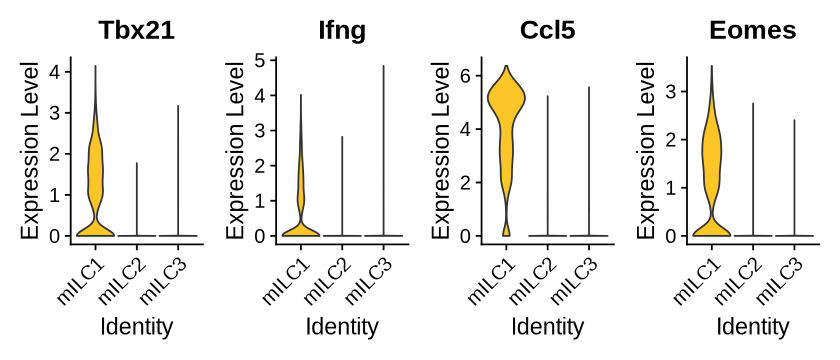

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 3)
genes_of_interest <- c('Tbx21','Ifng','Ccl5','Eomes')
VlnPlot(dat_plot, features = genes_of_interest, ncol = length(genes_of_interest), alpha = 0.1, pt.size = 0,cols = ilccolors)

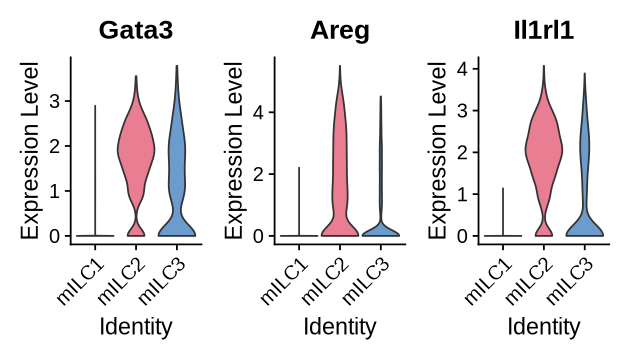

In [ ]:
options(repr.plot.width =5.25, repr.plot.height = 3)
features2 <- c('Gata3','Areg','Il1rl1')
VlnPlot(dat_plot, features = features2, ncol = length(features2), alpha = 0.2, pt.size = 0, cols = ilccolors)

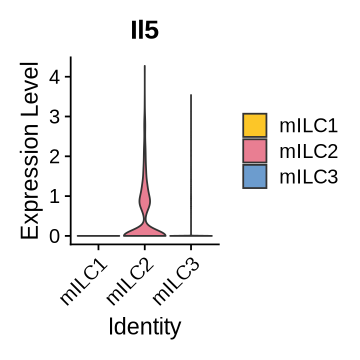

In [ ]:
options(repr.plot.width = 3, repr.plot.height = 3)
genes_of_interest <- c('Il5')
VlnPlot(dat_plot, features = genes_of_interest, ncol = length(genes_of_interest), alpha = 0.2, pt.size = 0, cols = ilccolors)

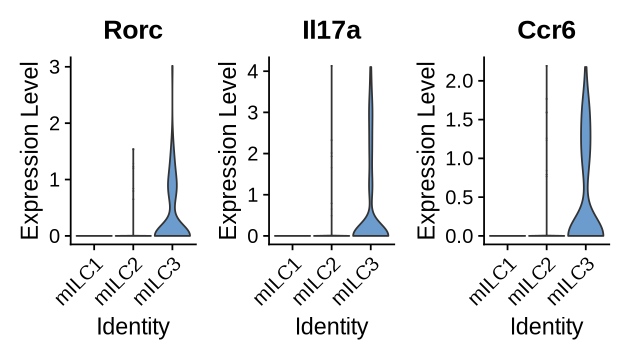

In [ ]:
options(repr.plot.width = 5.25, repr.plot.height = 3)
genes_of_interest <- c('Rorc','Il17a','Ccr6')
VlnPlot(dat_plot, features = genes_of_interest, ncol = length(genes_of_interest), alpha = 0.2, pt.size = 0, cols = ilccolors)

### Supp. Fig. 2B DEG overlaps
Venn Diagrams were created using numbers from the Upset Figure below

In [ ]:
plot_list <- list(deg1$gene_symbol, deg2$gene_symbol, deg3$gene_symbol)     
names(plot_list) <- c('ILC1', 'ILC2', 'ILC3')
options(repr.plot.width = 4, repr.plot.height = 4)
UpSetR::upset(fromList(plot_list))

### Supp. Fig. 3. Dotplot of shared genes 

In [551]:
viral_sensing <- c("Ifih1", "Zbp1", "Irf1", "Irf9", "Stat1", "Nmi")
antiviral_isg <- c("Isg15", "Usp18", "Eif2ak2", "Parp9", "Ifi203", "Ifi204", "Ifi35", "Ifi47", "Gbp4", "Gbp5", "Gbp6", "Gbp10", "Tgtp2", "Oasl1", "Igtp")
chemokines <- c('Cxcl9', 'Cxcl10','Cxcl11', 'Ccl5')
proinflammatory <- c("Casp1", "Hmgb1", "Adar", "Mndal", "Trim30a")
set <- c(viral_sensing, antiviral_isg, chemokines, proinflammatory) %>% unique 

Warning message:
“The following requested variables were not found: Cxcl11”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


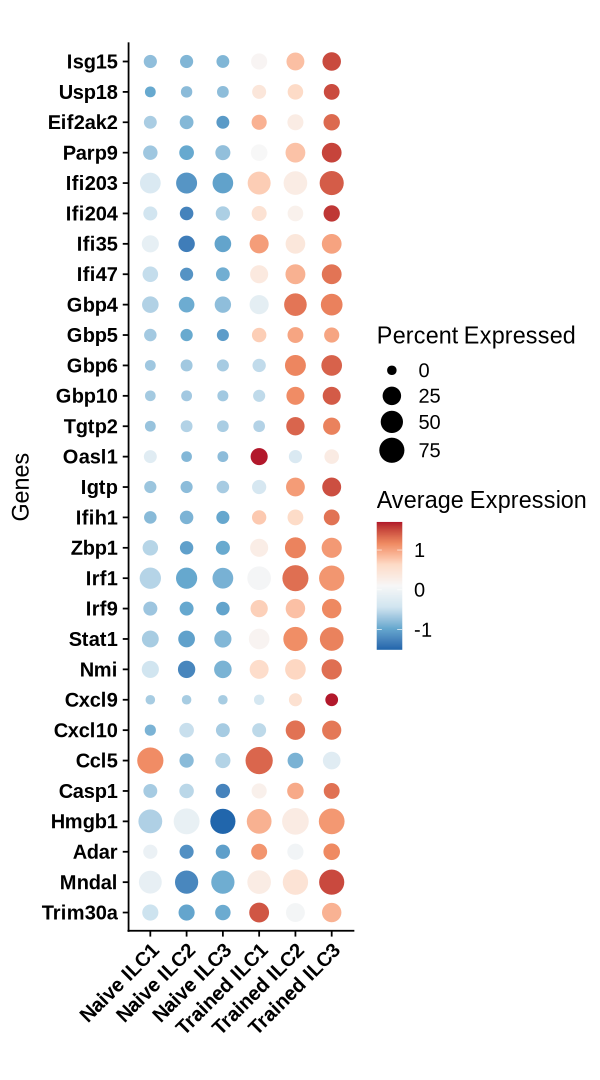

In [552]:
options(repr.plot.width = 5, repr.plot.height = 9)
DefaultAssay(dat) <- "RNA"
Idents(dat) <- dat@meta.data$sample
pathway_title <- ""
genes2plot <- c(antiviral_isg, viral_sensing, chemokines, proinflammatory) %>% rev
DotPlot(object = dat, features = genes2plot, cols="RdBu", 
col.min = -1.5, col.max = 1.7) + 
scale_size(range = c(2, 7)) +
scale_y_discrete(labels = c(
    "mILC1_control" = "Naive ILC1", 
    "mILC1_treatment" = "Trained ILC1", 
    "mILC2_control" = "Naive ILC2", 
    "mILC2_treatment" = "Trained ILC2",  
    "mILC3_control" = "Naive ILC3", 
    "mILC3_treatment" = "Trained ILC3")) + 
coord_flip() +
theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, face = "bold"), 
    axis.text.y = element_text(face = "bold"),
    legend.position = "right", 
    legend.box = "vertical",
    plot.title = element_text(size = 13)) +
labs(x = "Genes", y = "", title = pathway_title) 

### Supp. Fig. 4. Volcano plots

#### ILC1

[1] "Psma4"  "Romo1"  "Pycard" "Psmc3"  "Rbx1"   "Foxo3"  "Ccnd2"  "Cyba"  
 [9] "Smad7"  "Tspo"   "Tyrobp" "Sugt1"  "Irak2"

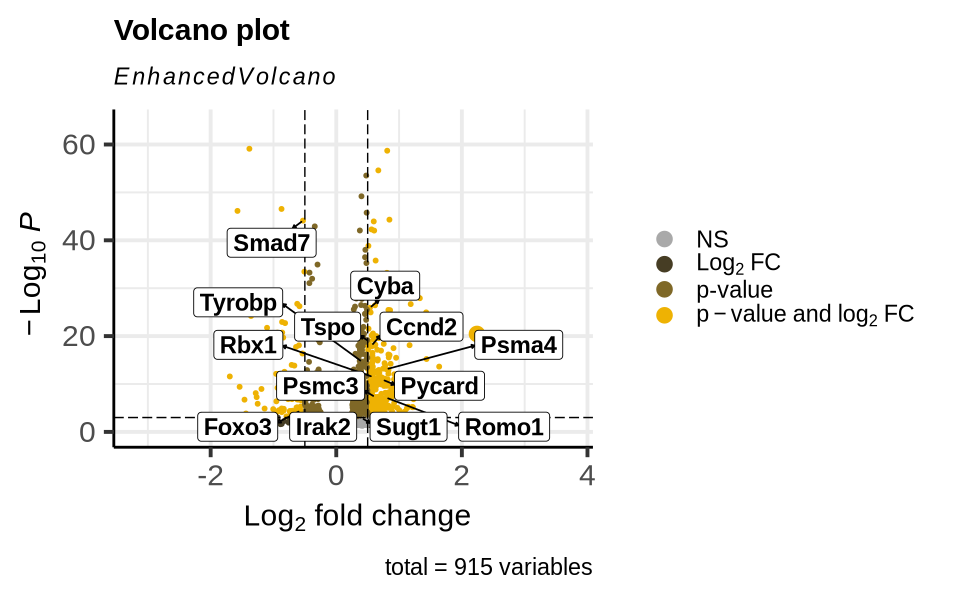

In [536]:
deg2plot <- deg1
pathway_genes <- c('Smad7',"Foxo3",'Tspo','Rbx1',"Cyba", "Romo1","Tyrobp","Ccnd2", "Irak2","Psma4","Psmc3","Pycard","Sugt1") %>% sort %>% rev

deg2hilight <- deg2plot %>% filter(gene_symbol %in% pathway_genes) %>% pull(gene_symbol) %>% unique
deg2hilight

options(repr.plot.width = 8, repr.plot.height = 5)
EnhancedVolcano(deg2plot,
    lab = deg2plot$gene_symbol,
    x = 'avg_log2FC',
    y = 'p_val_adj',
    selectLab = deg2hilight,
    xlab = bquote(~Log[2]~ 'fold change'),
    pCutoff = 0.001, 
    FCcutoff = 0.5,
    pointSize = c(ifelse(deg2plot$avg_log2FC>2, 4, 1)),
    labSize = 5,
    labCol = 'black',
    labFace = 'bold',
    boxedLabels = TRUE,
    colAlpha = 1,
    legendPosition = 'right',
    legendLabSize = 14,
    legendIconSize = 4.0,
    drawConnectors = TRUE,
    widthConnectors = 0.5,
    colConnectors = 'black', 
    max.overlaps = Inf,
    col = c('darkgrey','#463D24','#7F6827','#eeb203')) 

#### ILC2

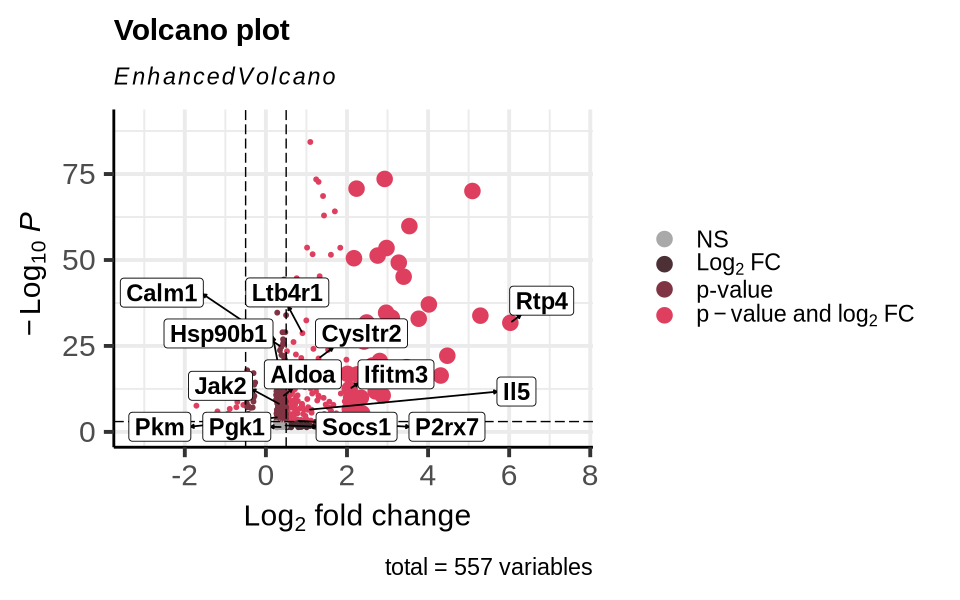

In [542]:
deg2plot <- deg2 %>% filter(-log10(p_val_adj) < 100)
pathway_genes <- c('Calm1','P2rx7','Hsp90b1','Jak2','Socs1','Il5','Pkm', 'Pgk1', 'Aldoa', 'Ltb4r1', 'Cysltr2', 'Rtp4','Ifitm3')
deg2hilight <- deg2plot %>% filter(gene_symbol %in% pathway_genes) %>% pull(gene_symbol) %>% unique

options(repr.plot.width = 8, repr.plot.height =  5)
EnhancedVolcano(deg2plot,
    lab = deg2plot$gene_symbol,
    x = 'avg_log2FC',
    y = 'p_val_adj',
    selectLab = deg2hilight,
    xlab = bquote(~Log[2]~ 'fold change'),
    pCutoff = 0.001, 
    FCcutoff = 0.5,
    pointSize = c(ifelse(deg2plot$avg_log2FC>2, 4, 1)),
    labSize = 5,
    labCol = 'black',
    labFace = 'bold',
    boxedLabels = TRUE,
    colAlpha = 1,
    legendPosition = 'right',
    legendLabSize = 14,
    legendIconSize = 4.0,
    drawConnectors = TRUE,
    widthConnectors = 0.5,
    colConnectors = 'black', 
    max.overlaps = Inf,
    col = c('darkgrey','#4C3035','#803342','#df3f5e')) 

#### ILC3

[1] "Ifi206"  "Stat1"   "Il23r"   "Il12rb1" "Rorc"    "Cd274"   "Il1r1"  
[8] "Icam1"   "Il17a"

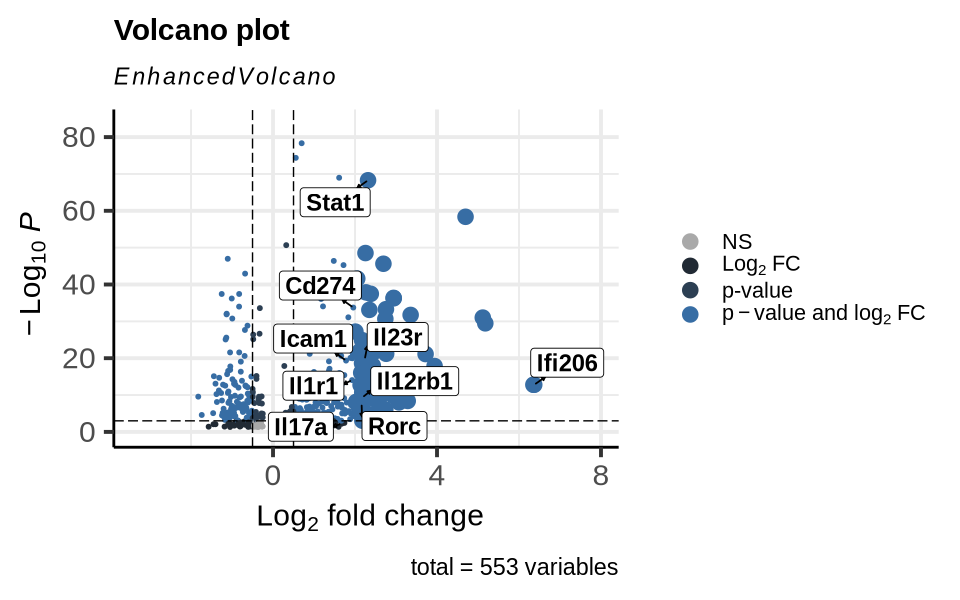

In [543]:
deg2plot <- deg3
pathway_genes <- c('Icam1','Il12rb1','Cd274', 'Ifi206', 'Il17a', 'Stat1','Il23r','Rorc','Il1r1') %>% sort %>% rev
deg2hilight <- deg2plot %>% filter(gene_symbol %in% pathway_genes) %>% pull(gene_symbol) %>% unique
deg2hilight

options(repr.plot.width = 8, repr.plot.height = 5)
EnhancedVolcano(deg2plot,
    lab = deg2plot$gene_symbol,
    x = 'avg_log2FC',
    y = 'p_val_adj',
    selectLab = deg2hilight,
    xlab = bquote(~Log[2]~ 'fold change'),
    pCutoff = 0.001, 
    FCcutoff = 0.5,
    pointSize = c(ifelse(deg2plot$avg_log2FC>2, 4, 1)),
    labSize = 5,
    labCol = 'black',
    labFace = 'bold',
    boxedLabels = TRUE,
    colAlpha = 1,
    legendPosition = 'right',
    legendLabSize = 13,
    legendIconSize = 4.0,
    drawConnectors = TRUE,
    widthConnectors = 0.5,
    colConnectors = 'black', 
    max.overlaps = 60,
    col = c('darkgrey','#212A34','#2C3F53','#376da4')) 